# 漸近理論

## 関係する定理

### マルコフの不等式

:::{admonition} マルコフの不等式
:class: info

非負の確率変数$X$と任意の定数$c > 0$に対して、

$$
P(X \geq c) \leq \frac{E[X]}{c}
$$

が成立する。
:::

:::{dropdown} 証明

指示関数$I(\cdot)$をもちいて

$$
\begin{aligned}
E[X]
&= E[X \{ I(X \geq c) + I(X < c) \} ]\\
& \geq E[X I(X \geq c) ]\\
& \geq c E[ I(X \geq c) ] = c P(X \geq c)
\end{aligned}
$$

:::


マルコフの不等式は **期待値よりも極端に大きな値を取る確率が低い** ことを意味する。

例えば$c = 5 E[X]$とおけば

$$
P(X \geq 5 E[X]) \leq \frac{E[X]}{5 E[X]} = \frac{1}{5}
$$

In [30]:
from scipy.stats import expon
mean = 2  # 期待値 E[X] = 2 の指数分布は scale=2
dist = expon(scale=mean)
threshold = 5 * mean # 5 * E[X]
# P(X >= 5 * E[X]) = 1 - CDF(threshold)
prob = 1 - dist.cdf(threshold)
upper_bound = 1 / 5 # マルコフの不等式の上限
print(f"P(X >= 5E[X]) = {prob:.2g}")
print(f"Markov Inequality Upper Bound = {upper_bound:.2g}")

P(X >= 5E[X]) = 0.0067
Markov Inequality Upper Bound = 0.2


### チェビシェフの不等式

:::{admonition} チェビシェフの不等式
:class: info

$E[X] = \mu, \mathrm{Var}[X] = \sigma^2$がいずれも有限な確率変数$X$を考える。

このとき任意の$c>0$に対して

$$
P(|X-\mu|\geq c)
\leq \frac{\sigma^2}{c^2}
$$

が成立する。
:::

:::{dropdown} 証明

$Y=(X-\mu)^2$とおき、$Y$にマルコフの不等式

$$
P(X \geq c) \leq \frac{E[X]}{c}
$$

を適用すれば、

$$
P(Y \geq c^2)
\leq \frac{E[Y]}{c^2}
= \frac{\sigma^2}{c^2}
$$

ここで $Y \geq c^2 \Longleftrightarrow|X-\mu| \geq c$ であるから $P(Y \geq c^2) = P(|X - \mu| \geq c)$ となり

$$
P(|X-\mu|\geq c)
\leq \frac{\sigma^2}{c^2}
$$

が成立する
:::

チェビシェフの不等式は **期待値から値が極端に離れる確率が低い** ことを意味する。

例えば$c = 5 \sigma$とおけば

$$
P(|X-\mu|\geq 5\sigma)
\leq \frac{\sigma^2}{5 \sigma^2} = \frac{1}{5}
$$

#### 例：2シグマ範囲

期待値からの2シグマ範囲には正規分布だと95%が入る。

In [73]:
import numpy as np
from scipy.stats import norm
mu = 0       # 平均
sigma = 1    # 標準偏差
lower = mu - 2 * sigma
upper = mu + 2 * sigma
dist = norm(loc=mu, scale=sigma)
# P(∣X−μ∣ ≤ 2σ) = P(μ−2σ ≤ X ≤ μ+2σ) = cdf(μ+2σ) - cdf(μ-2σ)
p_2sigma = dist.cdf(upper) - dist.cdf(lower) # P(-2σ <= X <= 2σ)
print(f"P(∣X−μ∣ ≤ 2σ) = {p_2sigma:.3f}")

P(∣X−μ∣ ≤ 2σ) = 0.954


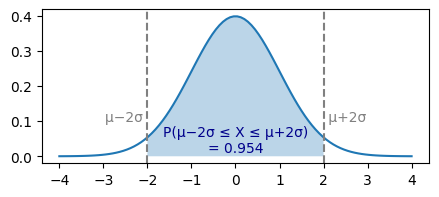

In [92]:
import matplotlib.pyplot as plt

# plot
fig, ax = plt.subplots(figsize=[5, 2])
x = np.linspace(-4, 4, 100)
y = dist.pdf(x)
ax.plot(x, y)

# 2σ points
x_2sig = dist.ppf(dist.cdf(2 * sigma))
ax.axvline(mu + x_2sig, color="gray", linestyle="--")
ax.axvline(mu - x_2sig, color="gray", linestyle="--")
ax.text(mu + x_2sig, 0.1, f" μ+2σ", ha="left", color="gray")
ax.text(mu - x_2sig, 0.1, f"μ−2σ ", ha="right", color="gray")

x = np.linspace(mu - x_2sig, mu + x_2sig, 100)
y = dist.pdf(x)
ax.fill_between(x, y, 0, alpha=0.3)

ax.text(0, 0.01, f"P(μ−2σ ≤ X ≤ μ+2σ)\n= {p_2sigma:.3f}", ha="center", color="darkblue")
plt.show()

チェビシェフの不等式による任意の分布への下限は

$$
\begin{aligned}
P(X \in [\mu-2\sigma, \mu+2\sigma])
= P(|X - \mu| \leq 2\sigma)
&\geq 1 - P(|X - \mu| \geq 2\sigma)\\
&= 1 - \frac{\sigma^2}{4\sigma^2}\\
&= 1 - \frac{1}{4}\\
&= \frac{3}{4}\\
\end{aligned}
$$

となり、正規分布以外でも75%以上あることがわかる

#### 例：期待値からのズレ

$n$個のサンプル$X_1,\dots,X_n$がi.i.d.であるとする。これらのサンプルの標本平均$\bar{X}$がその期待値$E[\bar{X}]$からどれだけズレるかを見てみる

$$
P(|\bar{X} - E[\bar{X}]|\geq c) \leq \frac{ \operatorname{Var}[\bar{X}]}{c^2}
$$

もし$c=1$なら、標本平均と期待値の差の絶対値が1以上になる確率はその分散が上限になるということ。

$$
P(|\bar{X} - E[\bar{X}]|\geq 1) \leq \operatorname{Var}[\bar{X}] = \frac{ \operatorname{Var}[X] }{ n }
$$

例えばサンプルが商談から成約したかどうかであり、真の成約率が20%という確率変数$X\sim Ber(p=0.2)$ の実現値だとすると、$E[\bar{X}]=0.2, \operatorname{Var}[\bar{X}] = p(1-p) = 0.16$で、このとき$c=0.1$とおけば

$$
P(|\bar{X} - 0.2| \geq 0.1) \leq \frac{0.16}{ n \times 0.1^2 } = \frac{ 16 }{ n }
$$

となり、仮に$n=100$なら16%程度の確率が上限（分布によらない上限）になることがわかる

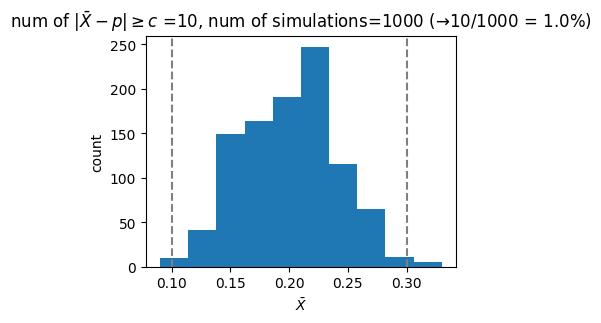

In [162]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
p = 0.2
dist = bernoulli(p=p)
n = 100
c = 0.1
bound = p * (1-p) / n / c**2

n_trials = 1000
x_bars = []
for i in range(n_trials):
    x = dist.rvs(size=n, random_state=i)
    x_bars.append( x.mean() )

fig, ax = plt.subplots(figsize=[4, 3])
ax.hist(x_bars, bins=10)
ax.axvline(p + c, color="gray", linestyle="--")
ax.axvline(p - c, color="gray", linestyle="--")

x_bars = np.array(x_bars)
is_over = np.abs(x_bars - p) >= c

ax.set(
    # title=r"histogram of $\bar{X}$",
    title=r"num of |$\bar{X} - p| \geq c$ =" + f"{is_over.sum()}, num of simulations={n_trials} (→{is_over.sum()}/{n_trials} = {is_over.sum() / n_trials:.1%})",
    xlabel=r"$\bar{X}$",
    ylabel="count"
)
fig.show()

## ヘフディングの不等式

チェビシェフの不等式は幅広い範囲で有用ではあるものの、裾の確率を緩く評価してしまう。

例えば上記の期待値からのズレの例

$$
P(|\bar{X} - 0.2| \geq 0.1) \leq \frac{ 16 }{ n }
$$

では、$n=1000$であっても「$1.6\%$は起こるかもしれない」というかなり安全に寄った評価をしてしまう。これは実際にシミュレーションすると0%になるレベルの稀少な事例にもかかわらず。

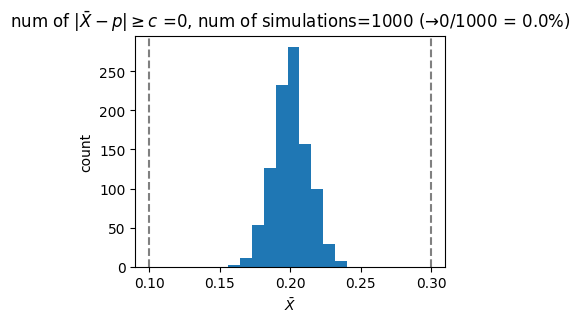

In [155]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
p = 0.2
dist = bernoulli(p=p)
n = 1000
c = 0.1
bound = p * (1-p) / n / c**2

n_trials = 1000
x_bars = []
for i in range(n_trials):
    x = dist.rvs(size=n, random_state=i)
    x_bars.append( x.mean() )

fig, ax = plt.subplots(figsize=[4, 3])
ax.hist(x_bars, bins=10)
ax.axvline(p + c, color="gray", linestyle="--")
ax.axvline(p - c, color="gray", linestyle="--")

x_bars = np.array(x_bars)
is_over = np.abs(x_bars - p) >= c

ax.set(
    # title=r"histogram of $\bar{X}$",
    title=r"num of |$\bar{X} - p| \geq c$ =" + f"{is_over.sum()}, num of simulations={n_trials} (→{is_over.sum()}/{n_trials} = {is_over.sum() / n_trials:.1%})",
    xlabel=r"$\bar{X}$",
    ylabel="count"
)
fig.show()

このような裾の確率をより厳しく抑えるのに役立つのが **ヘフディングの不等式 (Hoeffding's inequality)**

:::{admonition} 定理（ヘフディングの不等式）


$X_1,\dots,X_n$を独立な確率変数、$\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$をその標本平均とし、各$X_i$は区間$[a_i, b_i]$に値を取るとすると、任意の$c > 0$に対して

$$
P(|\bar{X}-E[\bar{X}]| \geq c) \leq 2 \exp \left(-\frac{2 n^2 c^2}{\sum_{i=1}^n (b_i-a_i)^2}\right)
$$

が成り立つ。

:::

すべての確率変数$X_i$が区間$[0,1]$に値を取る場合はもっと単純に


$$
P(|\bar{X}-E[\bar{X}]| \geq c) \leq 2 \exp( -2 n c^2 )
$$

となる。


前出の成約率の例だと、$n=1000, c=0.1$のとき

$$
\begin{aligned}
P(|\bar{X}-E[\bar{X}]| \geq 0.1)
&\leq 2 \exp( -2 \times 1000 \times 0.1^2 )\\
&= 2 \exp( -20 )\\
&\approx 4.122 \times 10^{-9} \approx 0
\end{aligned}
$$

となり、観測結果に近くなる。

しかし$n=100, c=0.1$のとき

$$
\begin{aligned}
P(|\bar{X}-E[\bar{X}]| \geq 0.1)
&\leq 2 \exp( -2 \times 100 \times 0.1^2 )\\
&= 2 \exp( -2 )\\
&\approx 0.27
\end{aligned}
$$

とだいぶ大きく評価することもある様子…？

## 確率収束

:::{admonition} （定義）確率収束
サンプル数$n$を無限大に近づけていったとき、確率変数列$\{X_n\}_{n=1}^{\infty}$が定数$c$から外れる確率がゼロに近づく、すなわち任意の$\varepsilon>0$について

$$
\lim_{n\to\infty} P(|X_n - c| > \varepsilon) = 0, \quad \forall\varepsilon > 0
$$

ならば、「$X_n$は$c$に**確率収束**（convergence in probability）する」といい

$$
\mathop{\mathrm{plim}}_{n\to\infty} X_n = c
$$

あるいは

$$
X_n \overset{p}{\to} c
, \quad (n\to\infty)
$$

と表す
:::

## 平均2乗収束

:::{admonition} （定義）平均2乗収束
確率変数列$\{X_n\}_{n=1}^{\infty}$が確率変数$X$に**平均2乗収束**するとは

$$
\lim_{n\to\infty} E[(X_n - X)^2] = 0
$$

となることをいう。
:::

チェビシェフの不等式を使うと「確率変数列がある確率変数に平均2乗収束するならば確率収束する」という命題が導かれる → 大数の法則


### 例：大数の法則

:::{admonition} （定理）大数の（弱）法則

$X_1, \dots, X_n$はi.i.d.で、$E[|X_i|] < \infty$とする。このとき、標本平均$\bar{X}$は$\mu = E[X_i]$に確率収束する

$$
\lim_{n\to\infty} P(|\bar{X} - \mu| > \varepsilon) = 0
$$
:::

:::{dropdown} 証明

$\varepsilon > 0$を任意の定数とする。$E[\bar{X}_n] = \mu, \mathrm{Var}[\bar{X}_n] = \sigma^2/n$であるから、$\bar{X}$にチェビシェフの不等式を適用すれば

$$
P(|\bar{X}_n-\mu| \geq \varepsilon) \leq \frac{\sigma^2}{n \varepsilon^2}
$$

となる。ここで$n \to \infty$とおけば右辺は0に収束するから

$$
\forall \varepsilon > 0, \quad
\lim_{n\to \infty} P(|\bar{X}_n-\mu| \geq \varepsilon) = 0
$$
:::

### 例：推定量の一致性

推定量$\hat{\theta}$が真のパラメータ$\theta$に確率収束

$$
\hat{\theta} \overset{p}{\to} \theta
$$

するとき、その推定量は**一致性**（consistency）を持つという

## 概収束

:::{admonition} （定義）概収束
確率変数列$\{X_n\}$が確率変数$X$について

$$
P(\{\omega | \lim_{n\to\infty} |X_n(\omega) - X(\omega)| = 0\}) = 1
$$

となるとき**概収束**（almost sure convergence）するといい、

$$
X_n \to X \text{ a.s. }
$$
と表す。
:::

## 分布収束

:::{admonition} （定義）分布収束
確率変数列$\{X_n\}$が確率変数$X$に**分布収束**（convergence in distribution）するとは、

$$
\lim_{n\to\infty} P(X_n \leq x) = P(X\leq x) = F_X(x)
$$

が$F_X(x)$のすべての連続な点で成り立つことをいい、$X_n \overset{d}{\to} X$と表す。
:::

### 例：中心極限定理

確率変数列$\{X_n\}_{n=1}^{\infty}$はi.i.d.で平均$\mu:=E[X_i]$と分散$\sigma^2:=Var(X_i)$が存在するとする。このとき、以下の分布収束が成り立つ

$$
\sqrt{n} (\bar{X} - \mu) \overset{d}{\to} N(0, \sigma^2)
,\hspace{1em} n\to\infty
$$

ここで$N(0, \sigma^2)$を$\bar{X}$の漸近分布（asymptoticd distribution）という。

（※なお、$N(0, \sigma^2)$は正規分布を表す記号ではなく、正規分布に従う**確率変数**を意味するので注意。ややこしい記法だが標準的でよく見られる書き方である）

なお、上の式は

$$
\bar{X} - \mu \overset{d}{\to} \frac{1}{\sqrt{n}} N(0, \sigma^2)
= N\left(0, \frac{\sigma^2}{n}\right)
$$

のように整理できる。

（$\sigma^2$は未知だが標本分散を用いてもこの関係性が成り立つ）

## 参考

- [絶対に分かる機械学習理論 - ｼﾞｮｲｼﾞｮｲｼﾞｮｲ](https://joisino.hatenablog.com/entry/theory?_gl=1*1cskm1k*_gcl_au*NjE2NDI4NTI2LjE3Mzc4NzI0NTU.)